In [1]:
#Installing or importing basic libriaries

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:

#checking the original dataset
data=pd.read_csv("/Users/vladimirant/Desktop/FIFA PROJECT ML CLASS/players_20.csv")

In [4]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [5]:
data.shape

(18278, 104)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
attribute_names=data.columns.values.tolist()
attribute_names

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

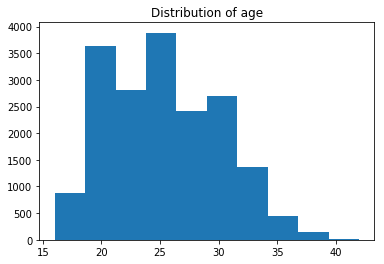

count    18278.000000
mean        25.283291
std          4.656964
min         16.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         42.000000
Name: age, dtype: float64

In [8]:
plt.title("Distribution of age")
plt.hist(data["age"])
plt.show()
np.mean(data["age"])
data["age"].describe()


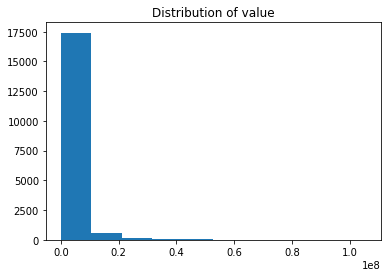

So we can see that the data is skewed and the mean is 2484037.640879746 EUR.
We need to standartize the data and probably take a logs. Also, we can see some 0 values
if taking the logs we should somehow to deal with the 0s


count    1.827800e+04
mean     2.484038e+06
std      5.585481e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.055000e+08
Name: value_eur, dtype: float64

In [9]:
plt.title("Distribution of value")
plt.hist(data["value_eur"])
plt.show()
data["value_eur"]
np.mean(data["value_eur"])
mean_print=np.mean(data["value_eur"])
print("So we can see that the data is skewed and the mean is", mean_print,"EUR.")
print ("We need to standartize the data and probably take a logs. Also, we can see some 0 values")
print ("if taking the logs we should somehow to deal with the 0s")
data["value_eur"].describe()


In [10]:
#So, here we can see that there are 250 rows with 0 values
data.loc[data['value_eur']==0]
#So, now we creating dataset that does not contain 0 
data_cool=data.loc[data['value_eur']!=0]



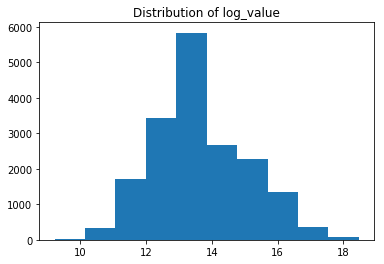

Mean of log_value is 13.661835223844578


count    18028.000000
mean        13.661835
std          1.398462
min          9.210340
25%         12.691580
50%         13.493927
75%         14.557448
max         18.474222
Name: value_eur, dtype: float64

In [11]:
#Plotting histogram ro see the distribution of value_eur log
log_value=np.log(data_cool['value_eur'])
plt.title("Distribution of log_value")
plt.hist(log_value)
plt.show()
print("Mean of log_value is", np.mean(log_value))
log_value.describe()



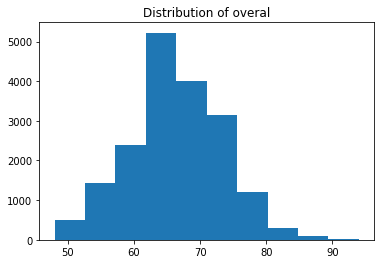

We can see that distrubution of the overal is pretty much normal and mean is 66.24499398183609


count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [12]:
plt.title("Distribution of overal")
plt.hist(data["overall"])
plt.show()
np.mean(data["overall"])
mean_print_o=np.mean(data["overall"])
print("We can see that distrubution of the overal is pretty much normal and mean is",mean_print_o )
data["overall"].describe()



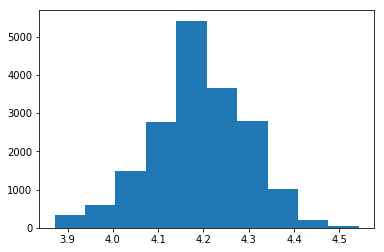

count    18278.000000
mean         4.187791
std          0.106003
min          3.871201
25%          4.127134
50%          4.189655
75%          4.262680
max          4.543295
Name: overall, dtype: float64

In [13]:
log_overall=np.log(data["overall"])
plt.hist(log_overall)
plt.show()
log_overall.describe()

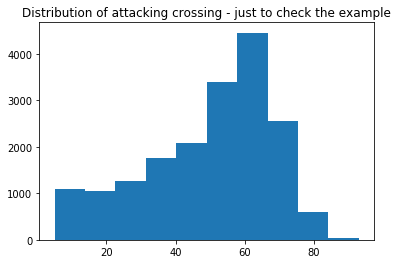

count    18278.000000
mean        49.718405
std         18.325403
min          5.000000
25%         38.000000
50%         54.000000
75%         64.000000
max         93.000000
Name: attacking_crossing, dtype: float64

In [14]:
plt.title("Distribution of attacking crossing - just to check the example")
plt.hist(data["attacking_crossing"])
plt.show()
data["attacking_crossing"].describe()


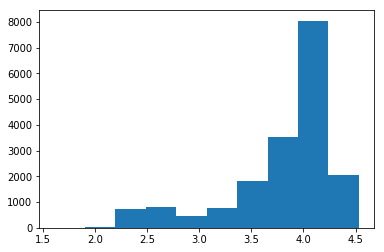

In [15]:
log_att_crossing=np.log(data["attacking_crossing"])
plt.hist(log_att_crossing)
plt.show()


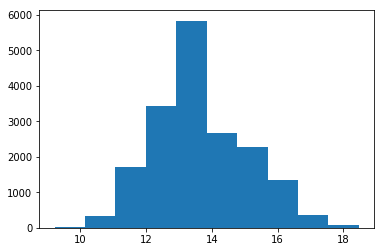

So after excluding 0-s and applying log to a data we can see that now distribution of log(value_eur) is looks like normal


count    18028.000000
mean        13.661835
std          1.398462
min          9.210340
25%         12.691580
50%         13.493927
75%         14.557448
max         18.474222
Name: value_eur, dtype: float64

In [16]:
values_log=np.log(data_cool["value_eur"])
plt.hist(values_log)
plt.show()

np.mean(values_log)

print("So after excluding 0-s and applying log to a data we can see that now distribution of log(value_eur) is looks like normal")
values_log.describe()

# So carefully checking the dataset, after scrutinizing some data we did some data processing in excel to sucesfully complete our project. Also we need: 
# 1) to check the data for 0s and exclude them if needed ( we excluded 250 rows where  transfer values were 0-s)
# 2) To check the data for missing values and replace them with mean values if needed (we used this option only for GK subset of data because only with this subset we had this kind of problem). 
# 3) To standartize all variables to a scale from 0-99, because most of the fifa features use this type of scale.

# 4) We found that players transfer values distribution is right skcewed. Most of the player features-attributes are normally distributed. The distribution of the features data becomes even more normal when devide the whole dataset in 4 subsets (GKs, DEFs, MILDs, FWs)

# So that's why in frames of this project we did 3 types of linear models:
 # a) linear (for this case we also did a regularization using Lasso and Ridge regression)
 # b) log-linear
 # c) log-log 
# In case of log-linear regression we took a log of the player's transfer values in euros only. 
# In case of log-log regression we took a logs both of values and the features that showed the srongest correlation with the transfer value


In [17]:
#Here I am deleting 0 values of Market Price (transfer value)
DATA=pd.read_excel("/Users/vladimirant/Desktop/FIFA PROJECT ML CLASS/FIFA DATA_FW_LIST.xlsx")
DATA=DATA.loc[DATA['value_eur']!=0]

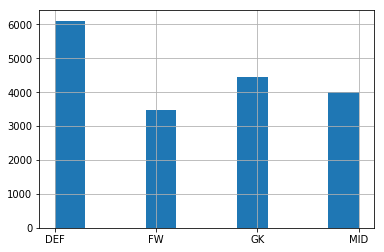

In [18]:
#the distribution of players by positions
DATA['Player class'].hist()
plt.show()

In [19]:
DATA_FOR_CALC=DATA[['age','Player class',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [20]:
#standartizing the data
DATA_FOR_CALC["age"]=DATA_FOR_CALC["age"]/42*99

DATA_FOR_CALC["height_cm"]=DATA_FOR_CALC["height_cm"]/205*99

DATA_FOR_CALC["weight_kg"]=DATA_FOR_CALC["weight_kg"]/110*99

DATA_FOR_CALC["international_reputation"]=DATA_FOR_CALC["international_reputation"]/5*99

DATA_FOR_CALC["skill_moves"]=DATA_FOR_CALC["skill_moves"]/5*99

DATA_FOR_CALC["weak_foot"]=DATA_FOR_CALC["weak_foot"]/5*99

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


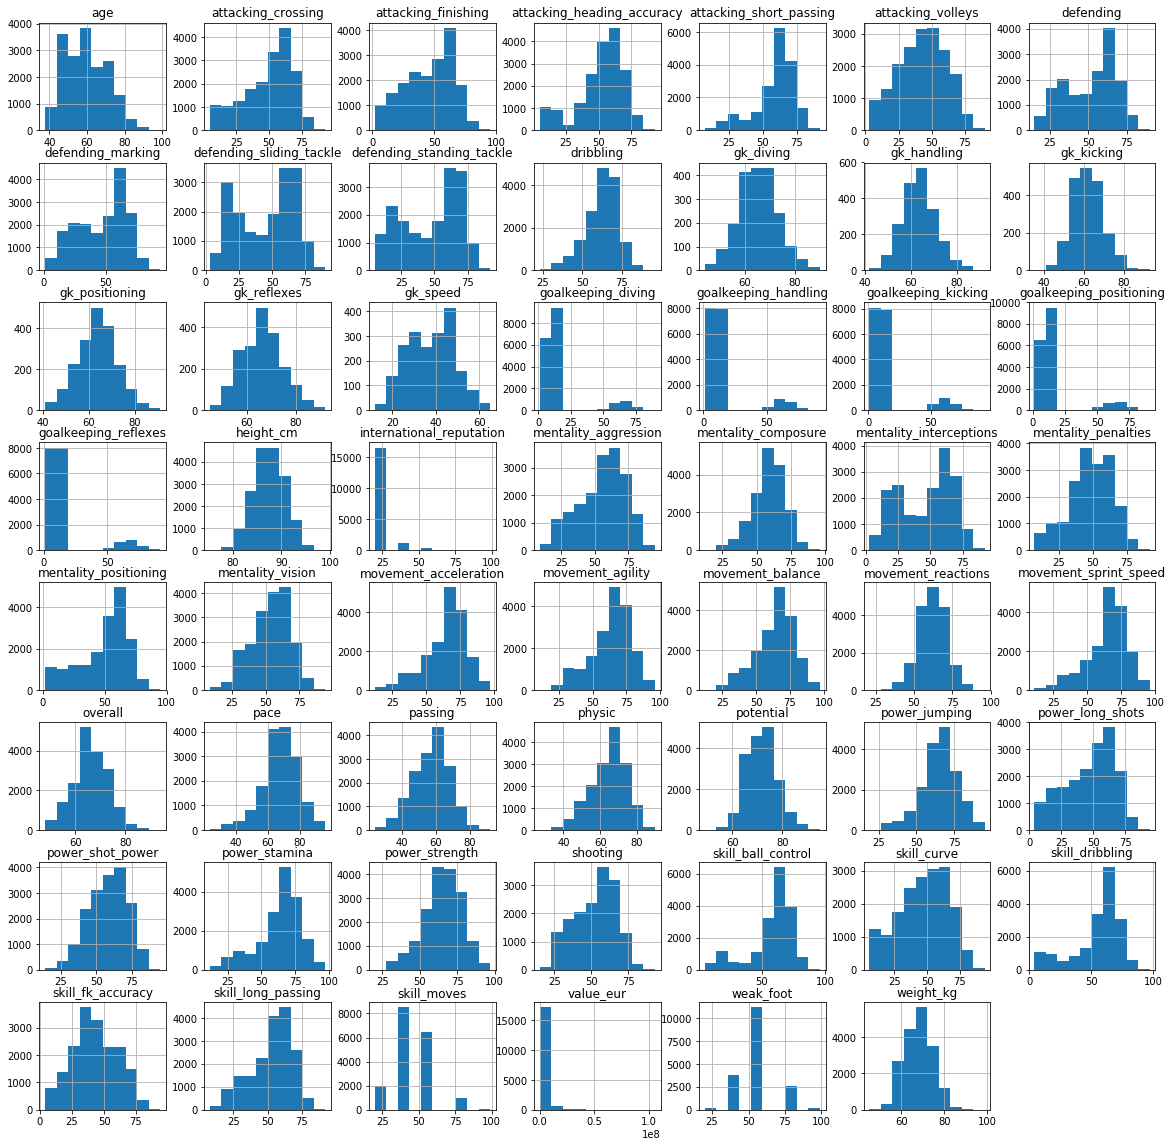

In [21]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
DATA_FOR_CALC.hist(ax=ax)
plt.show()

In [25]:
DATA_FOR_CALC.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,1.802800e+04,18028.000000,18028.000000,18028.000000,16032.000000,...,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000
mean,59.461897,87.584358,67.736133,66.205957,71.559463,2.518485e+06,21.834036,58.269858,46.897049,67.719561,...,48.370424,58.495174,46.828378,47.626082,45.591358,16.510428,16.301143,16.160417,16.310462,16.657588
std,10.922733,3.262458,6.345637,6.953858,6.140816,5.616359e+06,7.493077,13.158968,15.128024,11.284148,...,15.683408,11.855041,20.049283,21.555141,21.183823,17.660094,16.925791,16.553301,17.057334,17.968059
min,37.714286,75.336585,45.000000,48.000000,49.000000,1.000000e+04,19.800000,19.800000,19.800000,24.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,85.478049,63.000000,62.000000,67.000000,3.250000e+05,19.800000,59.400000,39.600000,61.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,87.409756,67.500000,66.000000,71.000000,7.250000e+05,19.800000,59.400000,39.600000,69.000000,...,49.000000,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,68.357143,89.824390,72.000000,71.000000,75.000000,2.100000e+06,19.800000,59.400000,59.400000,75.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,99.000000,99.000000,99.000000,94.000000,95.000000,1.055000e+08,99.000000,99.000000,99.000000,96.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


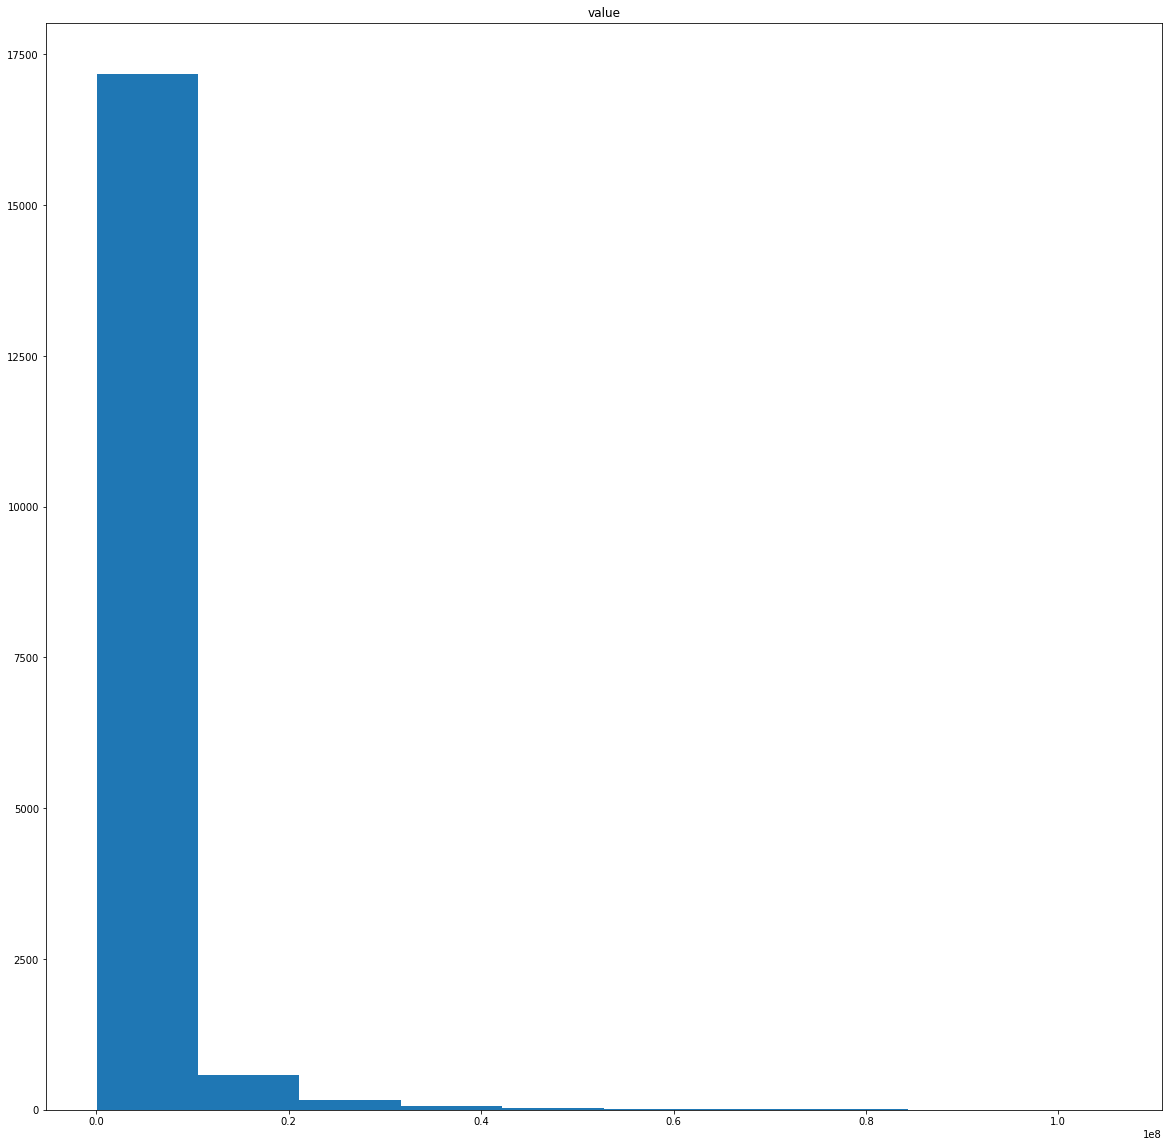

count    1.802800e+04
mean     2.518485e+06
std      5.616359e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.250000e+05
75%      2.100000e+06
max      1.055000e+08
Name: value_eur, dtype: float64

In [26]:
plt.title("value")
plt.hist(DATA_FOR_CALC["value_eur"])
plt.show()
DATA_FOR_CALC["value_eur"].describe()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


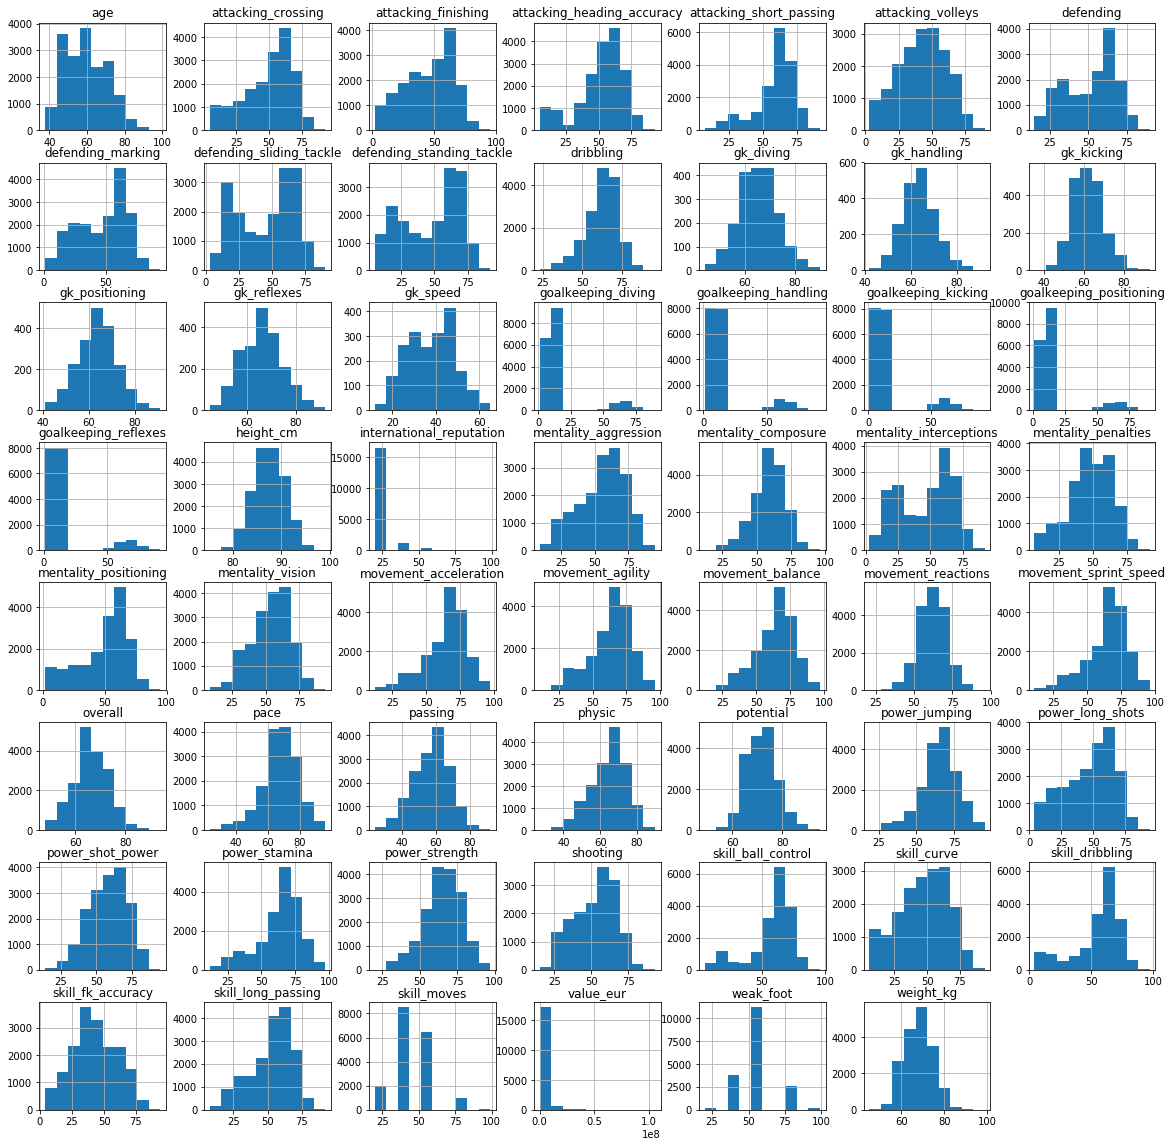

So for the most of the features data looks like normal, so it probably does not make sense to take a logs of features.
However, we will try to run simple linear regression, log-log regression, log-linear regression


In [27]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
DATA_FOR_CALC.hist(ax=ax)
plt.show()
print("So for the most of the features data looks like normal, so it probably does not make sense to take a logs of features.")
print("However, we will try to run simple linear regression, log-log regression, log-linear regression")

In [28]:
FORWARDS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "FW"]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


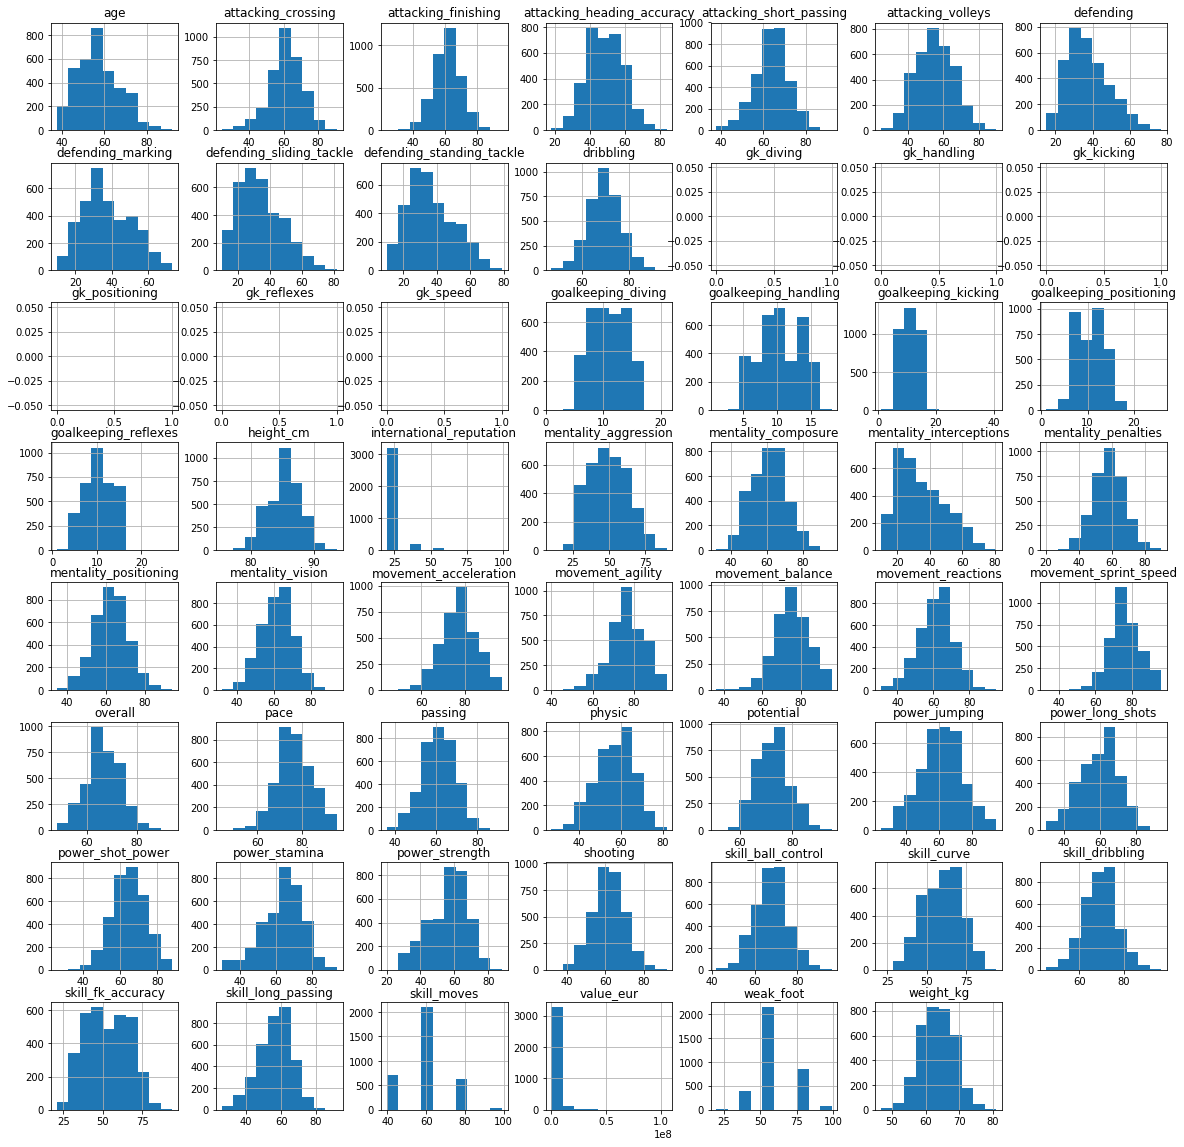

so we can see that the data for the all of forward's features is more or less normally distributed
However, we will probably have to deal with missing values and 0-s


In [29]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
FORWARDS.hist(ax=ax)
plt.show()

print("so we can see that the data for the all of forward's features is more or less normally distributed")
print('However, we will probably have to deal with missing values and 0-s')

In [31]:
# I delete wage and any economic indicators

FORWARDS2=FORWARDS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [32]:
FORWARDS2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3.478000e+03,3478.000000,3478.000000,3478.000000,3478.000000,...,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,57.231537,85.131613,63.403422,66.554054,72.467798,3.048534e+06,21.866532,62.832835,59.314606,76.535365,...,57.493387,61.106958,37.604658,36.289822,34.160150,10.418919,10.415756,10.466072,10.401668,10.397930
std,9.841311,2.565562,4.883309,6.854655,6.191784,6.798538e+06,7.679993,12.980882,12.956890,7.922786,...,9.493914,9.618794,13.297479,13.934559,13.358595,3.042534,3.024719,3.102204,3.043254,3.033191
min,37.714286,75.336585,46.800000,48.000000,51.000000,3.000000e+04,19.800000,19.800000,39.600000,44.000000,...,20.000000,32.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.500000,83.546341,60.300000,62.000000,68.000000,4.312500e+05,19.800000,59.400000,59.400000,71.000000,...,51.000000,54.000000,27.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,56.571429,84.995122,63.000000,66.000000,72.000000,9.000000e+05,19.800000,59.400000,59.400000,76.000000,...,58.000000,61.000000,36.000000,34.000000,32.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,63.642857,86.926829,66.600000,71.000000,76.000000,2.800000e+06,19.800000,79.200000,59.400000,82.000000,...,64.000000,68.000000,48.000000,46.000000,43.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,93.687805,81.000000,94.000000,95.000000,1.055000e+08,99.000000,99.000000,99.000000,96.000000,...,90.000000,96.000000,73.000000,79.000000,82.000000,21.000000,18.000000,41.000000,26.000000,27.000000


In [33]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

FORWARDS2.corrwith(FORWARDS2['value_eur'])




ds=(FORWARDS2.corrwith(FORWARDS2['value_eur']))



ds2=pd.DataFrame(ds)


ds2


ds2=ds2.sort_values(0)

FW_CORS=ds2.loc[ds2[0]>=0.5]

FW_CORS



,0
mentality_composure,0.544368
attacking_finishing,0.548149
mentality_vision,0.553202
attacking_short_passing,0.561812
movement_reactions,0.561906
passing,0.563669
potential,0.567296
mentality_positioning,0.570467
shooting,0.570596
skill_dribbling,0.601305


# Based on the correlation coefficients i am creating my x and y vector i will use for regressions.

In [34]:
FW_X=FORWARDS2[['mentality_composure',
'attacking_finishing',
'mentality_vision',
'attacking_short_passing',
'movement_reactions',
'passing',
'potential',
'mentality_positioning',
'shooting',
'skill_dribbling',
'skill_ball_control',
'dribbling',
'overall',
'international_reputation',
]]
FW_Y=FORWARDS2[["value_eur"]]


In [106]:
FW_X_train, FW_X_test, FW_Y_train, FW_Y_test = train_test_split(FW_X, FW_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, FW_X_train, FW_Y_train, cv=10)
scores
FW_CV=np.mean(scores)
FW_CV


0.615139806498053

In [66]:
#We run it just for expiremental purposes, however, it's not our best model

#SIMPLE LINEAR REGRESSION

FW_X_train, FW_X_test, FW_Y_train, FW_Y_test = train_test_split(FW_X, FW_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
regr.fit(FW_X_train, FW_Y_train)
FW_Y_pred = regr.predict(FW_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print( "Mean squared error: %.2f"
      %mean_squared_error(FW_Y_test, FW_Y_pred))
Lin_MSE_FW=mean_squared_error(FW_Y_test, FW_Y_pred)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(FW_Y_test, FW_Y_pred))

print("So, our R-squared is not high, this model is not that good")

Coefficients: 
 [[  21137.5880646   108281.36057764   28051.74811958    5454.27371377
    10593.59298274  -81598.85948808  265869.10661368  -47942.02910101
  -104233.66215062  -41101.43471757  -61838.50868423  -43884.64017755
   481384.42947326  436503.34967169]]
Mean squared error: 14508879638381.06
Variance score: 0.60
So, our R-squared is not high, this model is not that good


In [67]:
FW_X=np.array(FW_X)
FW_Y=np.array(FW_Y)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=13)
# X is the feature set and y is the target
for train_index, val_index in kf.split(FW_X,FW_Y): 
    print("Train:", train_index, "Validation:", val_index) 
    FW_X_train, FW_X_test = FW_X[train_index], FW_X[val_index] 
    FW_Y_train, FW_Y_test = FW_Y[train_index], FW_Y[val_index]

Train: [ 348  349  350 ..., 3475 3476 3477] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

In [68]:
# We are doing that mostly for experimental purposes
#Regularization-LASSO


LASSO_regr = Lasso(alpha=0.5)
LASSO_regr.fit(FW_X_train, FW_Y_train)
FW_Y_pred = LASSO_regr.predict(FW_X_test)
# The coefficients
print('Coefficients: \n', LASSO_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(FW_Y_test, FW_Y_pred))

Lasso_MSE_FW=mean_squared_error(FW_Y_test, FW_Y_pred)      
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(FW_Y_test, FW_Y_pred))

print("So, our R-squared is not that high, this model is not that cool")
print("Linear M MSE - Lasso MSE is equal", Lin_MSE_FW-Lasso_MSE_FW)

Coefficients: 
 [   6326.11283305   88239.65430462   -3764.68263442   28392.39039114
    6436.30813    -103981.38963933  251786.59393433  -49686.51126133
 -100140.51998827  -50463.97938349  -52892.44578808  -54033.39969704
  751330.74248837  355112.15478322]
Mean squared error: 29339373700268.48
Variance score: -15513.19
So, our R-squared is not that high, this model is not that cool
Linear M MSE - Lasso MSE is equal -1.48304940619e+13


In [48]:
356058112648.0/14152821525733.60
print("so MSE decreased just 2.5 percents")

so MSE decreased just 2.5 percents


In [69]:
#Regularization-RIDGE

FW_X_train, FW_X_test, FW_Y_train, FW_Y_test = train_test_split(FW_X, FW_Y, test_size = 0.3, random_state=120)
RIDGE_regr = Ridge(alpha=0.5)
RIDGE_regr.fit(FW_X_train, FW_Y_train)
FW_Y_pred = RIDGE_regr.predict(FW_X_test)
# The coefficients
print('Coefficients: \n', RIDGE_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(FW_Y_test, FW_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(FW_Y_test, FW_Y_pred))
Ridge_MSE_FW=mean_squared_error(FW_Y_test, FW_Y_pred)    
print("So, our R-squared is not that high, this model is not that cool")

print("Linear Model MSE - Ridge Model MSE is equal", Lin_MSE_FW-Ridge_MSE_FW)


Coefficients: 
 [[  18606.02910652  109834.26321555   31722.80019483   11331.6209889
     9758.53587375  -89158.8692402   266306.1277953   -47585.90988063
  -109826.42278895  -51646.52823233  -61924.73936061  -24401.81992578
   479602.22234849  448470.94456381]]
Mean squared error: 14152808791604.40
Variance score: 0.59
So, our R-squared is not that high, this model is not that cool
Linear Model MSE - Ridge Model MSE is equal 356070846777.0


In [70]:
MILD=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "MID"]

In [71]:
MILD

,age,Player class,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
5,66.000000,MID,87.409756,63.0,91,91,90000000,79.2,99.0,79.2,...,79,91,68,58,51,15,13,5,10,13
8,77.785714,MID,83.063415,59.4,90,90,45000000,79.2,79.2,79.2,...,82,92,68,76,71,13,9,7,14,9
15,66.000000,MID,81.131707,64.8,89,90,66000000,59.4,59.4,39.6,...,54,85,90,91,85,15,12,10,7,10
21,70.714286,MID,91.273171,68.4,89,89,55000000,79.2,59.4,59.4,...,60,93,90,86,80,5,8,13,9,13
23,58.928571,MID,85.478049,67.5,88,92,76500000,59.4,59.4,79.2,...,86,84,32,48,40,5,4,4,5,8
24,61.285714,MID,92.239024,75.6,88,91,72500000,79.2,79.2,99.0,...,83,87,63,67,65,5,6,2,4,3
27,63.642857,MID,87.409756,68.4,88,89,68000000,59.4,99.0,79.2,...,67,88,59,57,22,9,14,7,7,6
33,77.785714,MID,83.546341,60.3,88,88,36000000,79.2,39.6,79.2,...,75,92,59,53,29,6,15,7,6,12
36,68.357143,MID,88.375610,68.4,88,88,57000000,79.2,99.0,59.4,...,73,88,72,70,62,10,11,13,7,10
41,56.571429,MID,83.546341,57.6,87,90,64000000,39.6,59.4,79.2,...,68,87,49,59,40,9,10,14,12,9


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


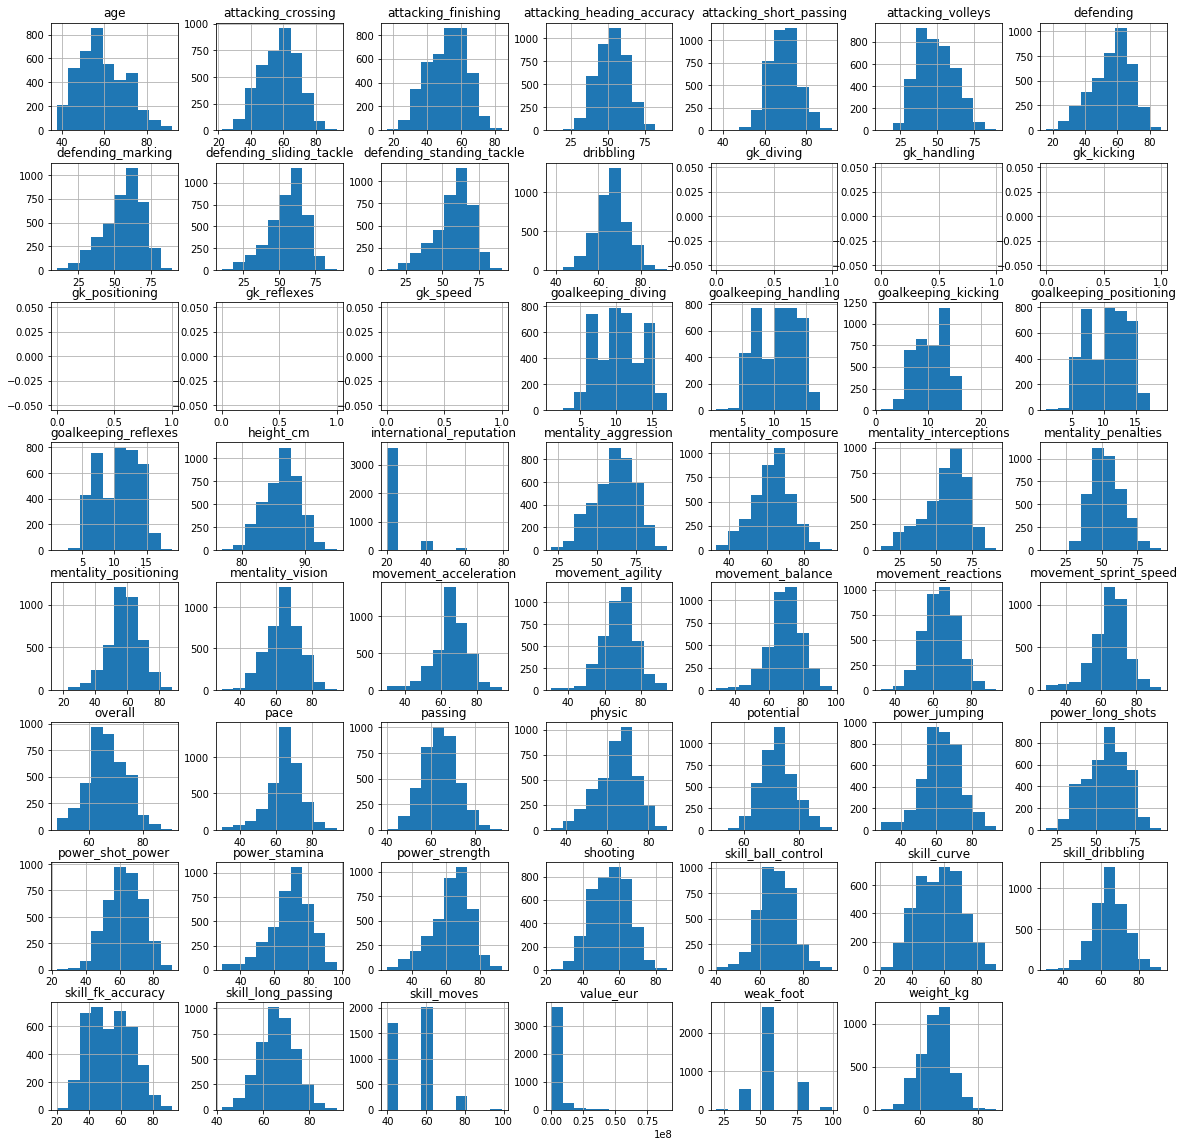

In [72]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
MILD.hist(ax=ax)
plt.show()


In [73]:
# I delete wage and any economic indicators

MILD2=MILD[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [74]:
MILD2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3.994000e+03,3994.000000,3994.000000,3994.000000,3994.000000,...,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,59.084377,86.364704,65.427341,66.773911,72.334502,3.073196e+06,22.293590,61.001252,52.410015,65.231097,...,53.567852,62.965949,55.677266,58.054331,55.133200,10.362293,10.474712,10.429644,10.479219,10.483225
std,10.947625,2.741446,5.203904,7.216672,6.218637,6.363623e+06,8.168815,12.299848,12.217151,9.282468,...,10.797224,10.354708,13.465291,13.116645,12.699607,3.102182,3.073437,3.053112,3.035427,3.050595
min,37.714286,76.785366,46.800000,48.000000,50.000000,3.000000e+04,19.800000,19.800000,39.600000,30.000000,...,11.000000,33.000000,10.000000,12.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.500000,84.512195,62.100000,62.000000,68.000000,4.000000e+05,19.800000,59.400000,39.600000,60.000000,...,45.000000,56.000000,47.000000,51.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,86.443902,65.700000,67.000000,72.000000,8.250000e+05,19.800000,59.400000,59.400000,66.000000,...,53.000000,63.000000,58.000000,60.000000,57.000000,10.000000,10.000000,10.000000,10.000000,11.000000
75%,66.000000,88.375610,68.400000,72.000000,76.000000,2.800000e+06,19.800000,59.400000,59.400000,71.000000,...,61.000000,70.000000,65.000000,67.000000,64.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,95.136585,86.400000,91.000000,92.000000,9.000000e+07,79.200000,99.000000,99.000000,94.000000,...,92.000000,95.000000,90.000000,91.000000,90.000000,17.000000,19.000000,23.000000,19.000000,19.000000


In [75]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

MILD2.corrwith(MILD2['value_eur'])




ds_M=(MILD2.corrwith(MILD2['value_eur']))



ds2_M=pd.DataFrame(ds_M)


ds2_M


ds2_M=ds2_M.sort_values(0)

MILD_CORS=ds2_M.loc[ds2_M[0]>=0.5]

MILD_CORS



,0
shooting,0.506262
mentality_composure,0.545173
mentality_vision,0.572710
skill_dribbling,0.580799
skill_long_passing,0.588106
movement_reactions,0.601475
potential,0.606526
dribbling,0.614241
passing,0.617648
skill_ball_control,0.631574


In [76]:
MILD_X=MILD2[['shooting',
'mentality_composure',
'mentality_vision',
'skill_dribbling',
'skill_long_passing',
'movement_reactions',
'potential',
'dribbling',
'passing',
'skill_ball_control',
'attacking_short_passing',
'international_reputation',
'overall']]
MILD_Y=MILD2[['value_eur']]



In [107]:
MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, MILD_X_train, MILD_Y_train, cv=10)
scores
MILD_CV=np.mean(scores)
MILD_CV



0.6266319715368569

In [58]:
#It's not our best model by the cross-validation score, however we decieded to run it just for the purpose of expiriment
#Simple linear regression
MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.3, random_state=120)
regr = LinearRegression()
regr.fit(MILD_X_train, MILD_Y_train)
MILD_Y_pred = regr.predict(MILD_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(MILD_Y_test, MILD_Y_pred))
Lin_MSE_MILD=mean_squared_error(MILD_Y_test, MILD_Y_pred)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(MILD_Y_test, MILD_Y_pred))

print("So, our R-squared is not that high, this model is not cool")


Coefficients: 
 [[   7238.04990687  -44480.74245176   48920.81605606  -81286.18003829
     1873.62116854   34078.7390759   255651.5733571   239874.55074469
  -118749.53440795 -132773.66873851   65264.15161687  335103.51557106
   276658.84172072]]
Mean squared error: 12671242247804.62
Variance score: 0.63
So, our R-squared is not that high, this model is not cool


In [59]:
#Regularization-LASSO

MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.3, random_state=120)
LASSO_regr = Lasso(alpha=0.5)
LASSO_regr.fit(MILD_X_train, MILD_Y_train)
MILD_Y_pred = LASSO_regr.predict(MILD_X_test)
# The coefficients
print('Coefficients: \n', LASSO_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(MILD_Y_test, MILD_Y_pred))
Lasso_MSE_MILD=mean_squared_error(MILD_Y_test, MILD_Y_pred)      
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(MILD_Y_test, MILD_Y_pred))

print("So, our R-squared is not that high, this model is not that cool")
print("Linear M MSE - Lasso MSE is equal", Lin_MSE_MILD-Lasso_MSE_MILD)

Coefficients: 
 [   7237.99793362  -44480.71523249   48920.72514099  -81285.7692932
    1873.52916242   34078.79001867  255651.58551936  239873.81297077
 -118749.22046401 -132773.34642314   65264.01881018  335103.49577416
  276658.72725923]
Mean squared error: 12671241923069.96
Variance score: 0.63
So, our R-squared is not that high, this model is not that cool
Linear M MSE - Lasso MSE is equal 324734.652344


In [60]:
#Regularization-RIDGE

MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.3, random_state=120)
RIDGE_regr = Ridge(alpha=0.5)
RIDGE_regr.fit(MILD_X_train, MILD_Y_train)
MILD_Y_pred = RIDGE_regr.predict(MILD_X_test)
# The coefficients
print('Coefficients: \n', RIDGE_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(MILD_Y_test, MILD_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(MILD_Y_test, MILD_Y_pred))
Ridge_MSE_MILD=mean_squared_error(MILD_Y_test, MILD_Y_pred)    
print("So, our R-squared is not that high, this model is not that cool")

print("Linear Model MSE - Ridge Model MSE is equal", Lin_MSE_MILD-Ridge_MSE_MILD)


Coefficients: 
 [[   7237.08594709  -44479.75561909   48918.28316968  -81260.67263388
     1871.3886497    34084.45702245  255651.44891436  239829.49042666
  -118738.8280747  -132753.45159012   65260.80623196  335101.83112587
   276644.91630505]]
Mean squared error: 12671217553549.74
Variance score: 0.63
So, our R-squared is not that high, this model is not that cool
Linear Model MSE - Ridge Model MSE is equal 24694254.8789


In [61]:
DEFENDERS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "DEF"]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


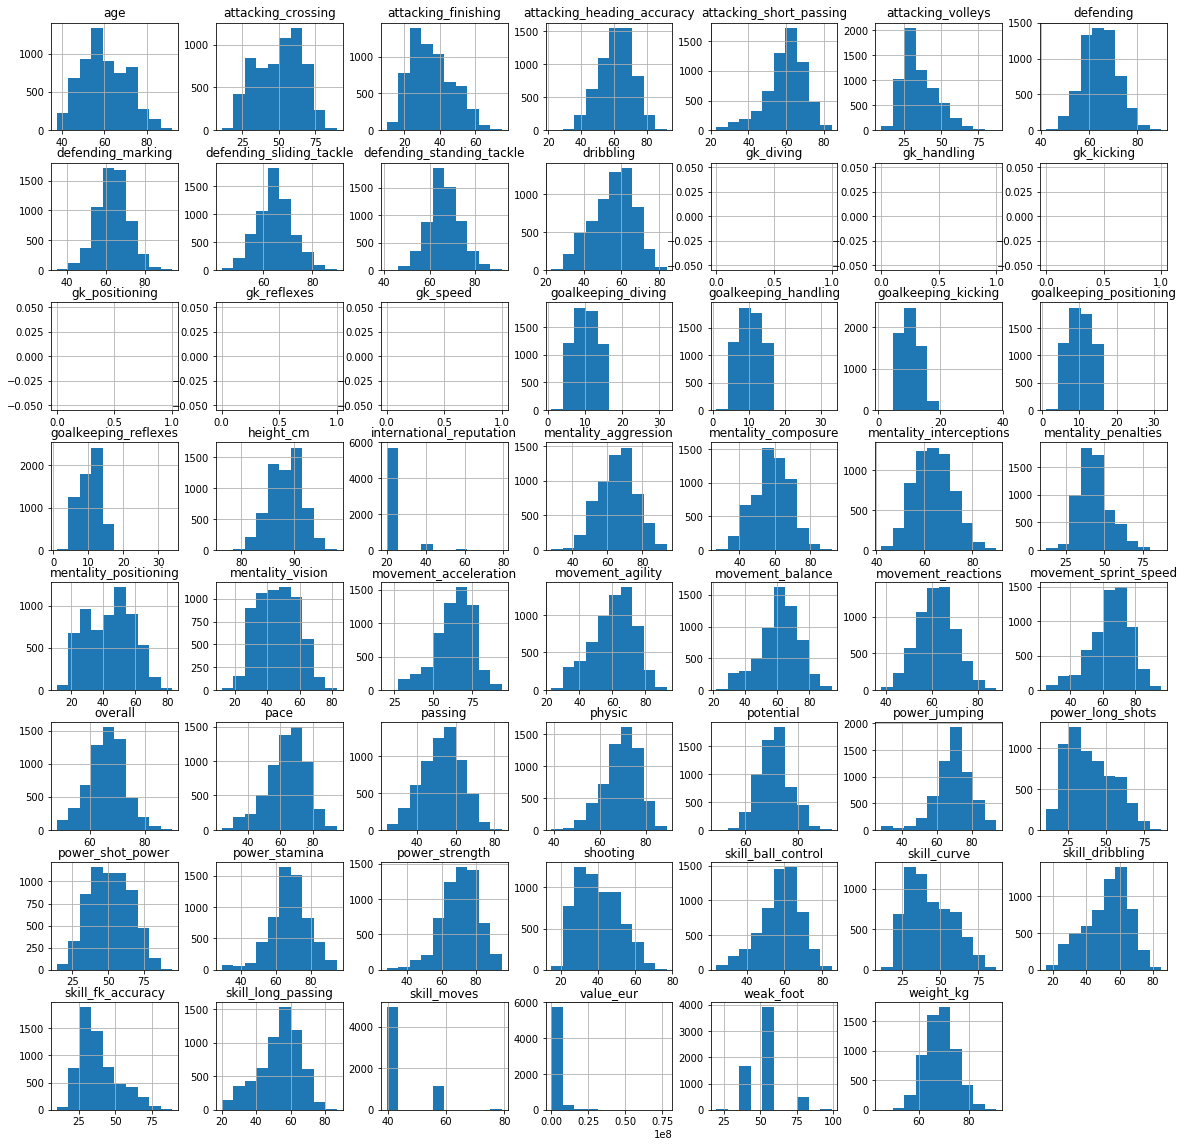

In [62]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
DEFENDERS.hist(ax=ax)
plt.show()

In [78]:
DEF2=DEFENDERS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [79]:
DEF2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6.107000e+03,6107.000000,6107.000000,6107.000000,6107.000000,...,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,60.087265,88.265455,68.845653,66.100868,71.112166,2.077148e+06,21.453512,55.713640,43.471164,64.157360,...,43.224005,58.152939,63.595546,66.498608,64.820861,10.485508,10.471917,10.462911,10.473882,10.468479
std,10.625049,3.006880,5.888154,6.583385,5.870563,4.383686e+06,6.575464,11.790906,8.102715,11.770486,...,10.130346,10.126510,8.150816,6.971618,7.117930,3.023531,3.035383,3.075913,3.039013,3.046121
min,37.714286,76.302439,45.000000,48.000000,49.000000,1.000000e+04,19.800000,19.800000,39.600000,24.000000,...,12.000000,27.000000,35.000000,41.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,85.960976,64.800000,62.000000,67.000000,3.250000e+05,19.800000,39.600000,39.600000,57.000000,...,36.000000,51.000000,58.000000,62.000000,60.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,88.375610,68.400000,66.000000,71.000000,6.750000e+05,19.800000,59.400000,39.600000,66.000000,...,42.000000,59.000000,64.000000,66.000000,64.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,68.357143,90.307317,72.900000,70.000000,75.000000,1.800000e+06,19.800000,59.400000,39.600000,73.000000,...,49.000000,65.000000,69.000000,71.000000,70.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,98.034146,90.900000,90.000000,93.000000,7.800000e+07,79.200000,99.000000,79.200000,95.000000,...,87.000000,92.000000,94.000000,92.000000,90.000000,32.000000,33.000000,38.000000,32.000000,34.000000


In [80]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

DEF2.corrwith(DEF2['value_eur'])




ds_D=(DEF2.corrwith(DEF2['value_eur']))



ds2_D=pd.DataFrame(ds_D)


ds2_D


ds2_D=ds2_D.sort_values(0)

DEF_CORS=ds2_D.loc[ds2_D[0]>=0.5]

DEF_CORS

,0
mentality_composure,0.504126
international_reputation,0.573562
defending_marking,0.576690
movement_reactions,0.583910
mentality_interceptions,0.600192
potential,0.602903
defending_sliding_tackle,0.614460
defending_standing_tackle,0.625053
defending,0.633682
overall,0.652145


In [81]:
DEF_X=DEF2[[
'mentality_composure',
'international_reputation',
'defending_marking',
'movement_reactions',
'mentality_interceptions',
'potential',
'defending_sliding_tackle',
'defending_standing_tackle',
'defending',
'overall']]
    
DEF_Y=DEF2[['value_eur']]

In [108]:
DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, DEF_X_train, DEF_Y_train, cv=10)
scores
DEF_CV=np.mean(scores)
DEF_CV

0.57201628681733596

In [85]:
#It's not the model with the best cross_val score, but we run it for educational purposes

DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.2, random_state=120)
regr = LinearRegression()
regr.fit(DEF_X_train, DEF_Y_train)
DEF_Y_pred = regr.predict(DEF_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DEF_Y_test, DEF_Y_pred))
Lin_MSE_DEF=mean_squared_error(DEF_Y_test, DEF_Y_pred)  
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DEF_Y_test, DEF_Y_pred))

print("So, our R-squared is not high, this model is not that good")


Coefficients: 
 [[ -26419.99518251  222409.73390117   19138.46942977   51535.31059881
    17108.14704909  210631.85330894   30168.61653038   64906.25100502
  -111644.68941038  172856.39496459]]
Mean squared error: 7568149098366.30
Variance score: 0.59
So, our R-squared is not high, this model is not that good


In [86]:
#Regularization-LASSO

DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.3, random_state=120)
LASSO_regr = Lasso(alpha=0.5)
LASSO_regr.fit(DEF_X_train, DEF_Y_train)
DEF_Y_pred = LASSO_regr.predict(DEF_X_test)
# The coefficients
print('Coefficients: \n', LASSO_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DEF_Y_test, DEF_Y_pred))
Lasso_MSE_DEF=mean_squared_error(DEF_Y_test, DEF_Y_pred)      
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DEF_Y_test, DEF_Y_pred))

print("So, our R-squared is not that high, this model is not that cool")
dif_MSE=7629511683832.04-7629511202456.98
print("Linear M MSE - Lasso MSE is equal", Lin_MSE_DEF-Lasso_MSE_DEF)


Coefficients: 
 [ -27463.61149192  227632.78118933   21521.98914055   53523.47282189
   15595.58387498  209049.04204551   37178.78857557   73613.72376949
 -128046.39931559  178924.72047202]
Mean squared error: 7211414121234.88
Variance score: 0.58
So, our R-squared is not that high, this model is not that cool
Linear M MSE - Lasso MSE is equal 356734977131.0


In [87]:
#Regularization-RIDGE

DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.3, random_state=120)
RIDGE_regr = Ridge(alpha=0.5)
RIDGE_regr.fit(DEF_X_train, DEF_Y_train)
DEF_Y_pred = RIDGE_regr.predict(DEF_X_test)
# The coefficients
print('Coefficients: \n', RIDGE_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DEF_Y_test, DEF_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DEF_Y_test, DEF_Y_pred))
Ridge_MSE_DEF=mean_squared_error(DEF_Y_test, DEF_Y_pred)    
print("So, our R-squared is not that high, this model is not that cool")

print("Linear Model MSE - Ridge Model MSE is equal", Lin_MSE_DEF-Ridge_MSE_DEF)


Coefficients: 
 [[ -27462.94972132  227632.00726665   21512.24007223   53525.26746108
    15589.58694903  209048.6763115    37177.7692134    73602.32701259
  -128012.49143428  178916.13220571]]
Mean squared error: 7211408256754.50
Variance score: 0.58
So, our R-squared is not that high, this model is not that cool
Linear Model MSE - Ridge Model MSE is equal 356740841612.0


In [88]:
GKS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "GK"]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


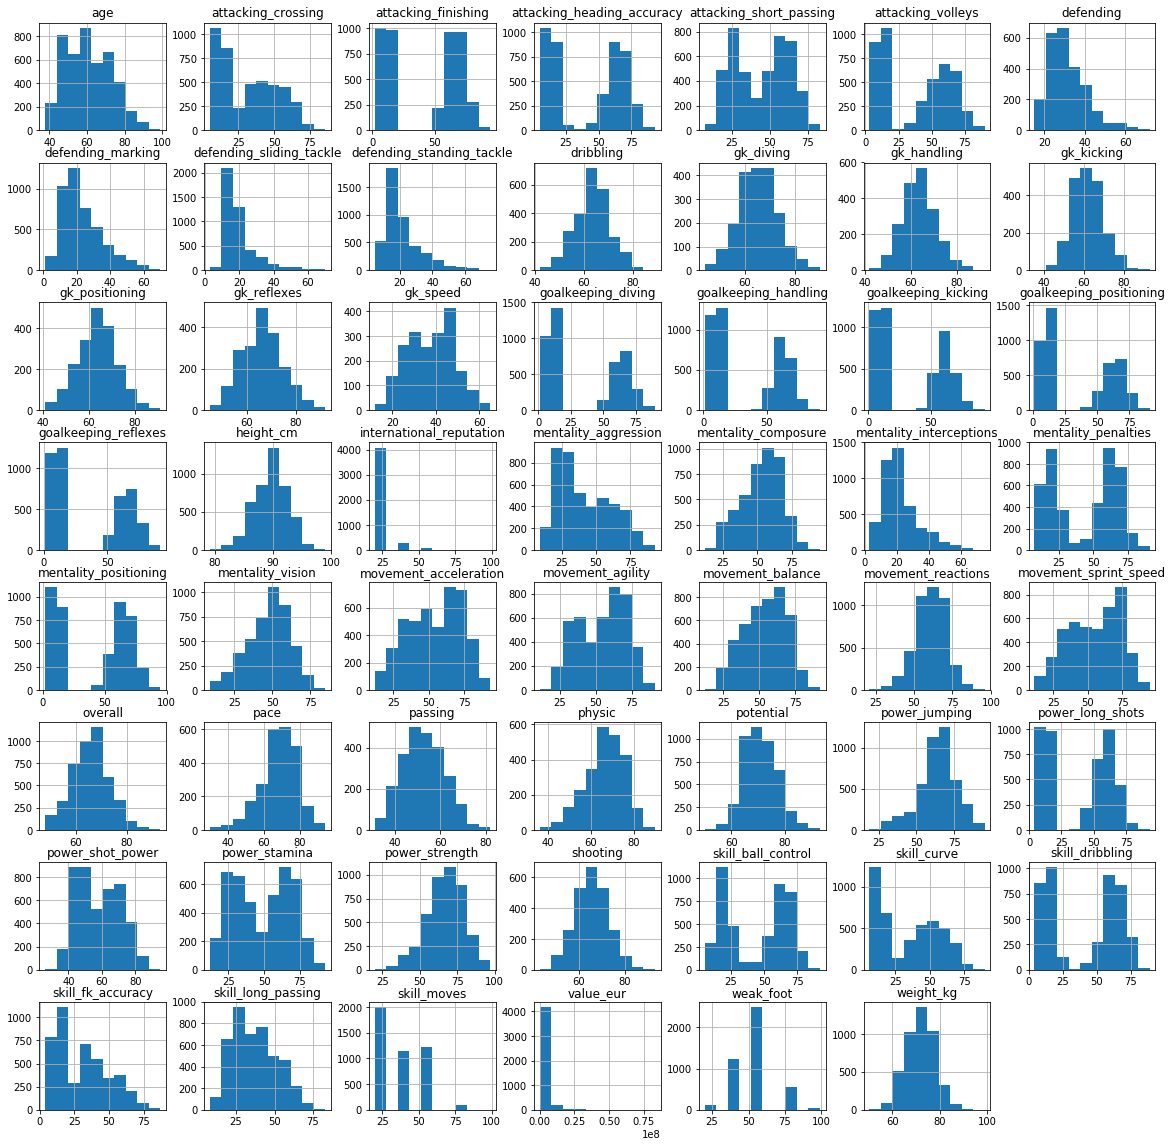

In [89]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
GKS.hist(ax=ax)
plt.show()

In [90]:
GKS2=GKS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [91]:
GKS2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4.449000e+03,4449.000000,4449.000000,4449.000000,2453.000000,...,4449.000000,4449.000000,4449.000000,4449.000000,4449.00000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,60.685965,89.661786,71.672893,65.568218,70.767588,2.211947e+06,21.918409,55.759541,36.943088,68.140236,...,43.636997,52.909643,23.079344,21.220724,19.56597,35.062036,34.134187,33.577433,34.176219,35.589571
std,11.798424,2.800010,5.999490,7.224582,6.224944,5.302813e+06,7.860756,14.323102,17.581012,10.298081,...,23.081888,14.338734,12.246210,11.204537,9.78796,27.902229,26.654771,26.054011,26.965388,28.358694
min,37.714286,79.200000,50.400000,48.000000,50.000000,1.000000e+04,19.800000,19.800000,19.800000,30.000000,...,7.000000,12.000000,1.000000,5.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,87.892683,67.500000,61.000000,66.000000,2.500000e+05,19.800000,39.600000,19.800000,62.000000,...,20.000000,44.000000,14.000000,13.000000,13.00000,10.000000,10.000000,10.000000,10.000000,10.000000
50%,58.928571,89.824390,72.000000,65.000000,70.000000,6.250000e+05,19.800000,59.400000,39.600000,69.000000,...,53.000000,55.000000,20.000000,18.000000,17.00000,15.000000,15.000000,15.000000,15.000000,15.000000
75%,68.357143,91.756098,75.600000,70.000000,75.000000,1.600000e+06,19.800000,59.400000,59.400000,75.000000,...,64.000000,63.000000,30.000000,25.000000,22.00000,64.000000,62.000000,60.000000,62.000000,65.000000
max,99.000000,99.000000,99.000000,93.000000,93.000000,8.300000e+07,99.000000,99.000000,99.000000,94.000000,...,91.000000,95.000000,70.000000,75.000000,70.00000,90.000000,92.000000,93.000000,91.000000,92.000000


In [92]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

GKS2.corrwith(GKS2['value_eur'])




ds_G=(GKS2.corrwith(GKS2['value_eur']))



ds2_G=pd.DataFrame(ds_G)


ds2_G


ds2_G=ds2_G.sort_values(0)

GK_CORS=ds2_G.loc[ds2_G[0]>=0.5]

GK_CORS

,0
gk_positioning,0.526196
movement_reactions,0.534950
gk_reflexes,0.561436
gk_diving,0.563761
gk_handling,0.566170
dribbling,0.570014
potential,0.573559
international_reputation,0.602906
overall,0.628626
shooting,0.629967


In [93]:
GK_X=GKS2[[
'gk_positioning',
'movement_reactions',
'gk_reflexes',
'gk_diving'	,
'gk_handling',
'dribbling',
'potential',
'international_reputation',
'overall',
'shooting'
]]

GK_Y=GKS2[[
'value_eur']  
]

In [94]:
GK_X.describe

<bound method NDFrame.describe of        gk_positioning  movement_reactions  gk_reflexes  gk_diving  \
1                 NaN                  96          NaN        NaN   
3                90.0                  88         89.0       87.0   
6                88.0                  86         90.0       88.0   
12                NaN                  91          NaN        NaN   
13               90.0                  88         89.0       85.0   
14               85.0                  87         92.0       90.0   
17                NaN                  92          NaN        NaN   
19                NaN                  92          NaN        NaN   
20                NaN                  90          NaN        NaN   
25               86.0                  87         88.0       86.0   
28               85.0                  83         87.0       85.0   
30               89.0                  83         89.0       88.0   
31               85.0                  84         87.0       87.0   


In [95]:
# here when trying to run the code the program claimed about the issues, 
#so i had to solve the problems with missing values. 
#This code helps to substitute missing values with mean    
GK_X=GK_X.fillna(GK_X.mean())

In [96]:
GK_X.describe

<bound method NDFrame.describe of        gk_positioning  movement_reactions  gk_reflexes  gk_diving  \
1           63.286573                  96    66.319639  65.340681   
3           90.000000                  88    89.000000  87.000000   
6           88.000000                  86    90.000000  88.000000   
12          63.286573                  91    66.319639  65.340681   
13          90.000000                  88    89.000000  85.000000   
14          85.000000                  87    92.000000  90.000000   
17          63.286573                  92    66.319639  65.340681   
19          63.286573                  92    66.319639  65.340681   
20          63.286573                  90    66.319639  65.340681   
25          86.000000                  87    88.000000  86.000000   
28          85.000000                  83    87.000000  85.000000   
30          89.000000                  83    89.000000  88.000000   
31          85.000000                  84    87.000000  87.000000   


In [109]:
GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, GK_X_train, GK_Y_train, cv=10)
scores
GK_CV=np.mean(scores)
GK_CV

0.5250947416588907

In [110]:
#IT's not our best model, however we dicided to run it for educational purposes
#Linear Model
GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.3, random_state=120)
regr = LinearRegression()
regr.fit(GK_X_train, GK_Y_train)
GK_Y_pred = regr.predict(GK_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GK_Y_test, GK_Y_pred))
Lin_MSE_GK=mean_squared_error(GK_Y_test, GK_Y_pred)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GK_Y_test, GK_Y_pred))

print("So, our R-squared is not that high, this model is not that cool")


Coefficients: 
 [[-149932.96035227  -17657.88042383  -64627.8562852   -63796.54812239
    18732.37305257  -26686.65768394  231341.86437999  268788.84532355
   439256.70366188 -118411.37298064]]
Mean squared error: 7629511683832.04
Variance score: 0.57
So, our R-squared is not that high, this model is not that cool


In [111]:
#Regularization-LASSO

GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.3, random_state=120)
LASSO_regr = Lasso(alpha=0.5)
LASSO_regr.fit(GK_X_train, GK_Y_train)
GK_Y_pred = LASSO_regr.predict(GK_X_test)
# The coefficients
print('Coefficients: \n', LASSO_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GK_Y_test, GK_Y_pred))
Lasso_MSE_GK=mean_squared_error(GK_Y_test, GK_Y_pred)      
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GK_Y_test, GK_Y_pred))

print("So, our R-squared is not that high, this model is not that cool")
dif_MSE=7629511683832.04-7629511202456.98
print("Linear M MSE - Lasso MSE is equal", Lin_MSE_GK-Lasso_MSE_GK)


Coefficients: 
 [-149932.71203264  -17657.77072794  -64627.67630635  -63796.32568263
   18732.35901184  -26686.47268764  231341.86337842  268788.83928182
  439255.93821363 -118410.91987565]
Mean squared error: 7629511202456.98
Variance score: 0.57
So, our R-squared is not that high, this model is not that cool
Linear M MSE - Lasso MSE is equal 481375.056641


In [112]:
#Regularization-RIDGE
GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.3, random_state=120)
RIDGE_regr = Ridge(alpha=0.5)
RIDGE_regr.fit(GK_X_train, GK_Y_train)
GK_Y_pred = RIDGE_regr.predict(GK_X_test)
# The coefficients
print('Coefficients: \n', RIDGE_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GK_Y_test, GK_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GK_Y_test, GK_Y_pred))
Ridge_MSE_GK=mean_squared_error(GK_Y_test, GK_Y_pred)    
print("So, our R-squared is not that high, this model is not that cool")

print("Linear Model MSE - Ridge Model MSE is equal", Lin_MSE_GK-Ridge_MSE_GK)


Coefficients: 
 [[-149916.9260198   -17649.00643984  -64616.61227197  -63783.82246188
    18741.87400597  -26674.57195713  231342.5977327   268788.40616078
   439197.13358182 -118375.74812899]]
Mean squared error: 7629477391673.11
Variance score: 0.57
So, our R-squared is not that high, this model is not that cool
Linear Model MSE - Ridge Model MSE is equal 34292158.9258


In [113]:
print("So, both Ridge and Lasso models help to improve the MSE, Ridge model is more effecitve ")
print("However, the overall performance of the model is still quite poor")

So, both Ridge and Lasso models help to improve the MSE, Ridge model is more effecitve 
However, the overall performance of the model is still quite poor


In [116]:
CV_AVERAGE=np.mean([FW_CV,MILD_CV,DEF_CV,GK_CV])

In [119]:
print("So our average Cross validation score for linear model is ", CV_AVERAGE)
print("We run the cross validation on the training set only, because when we run it on the full set we were not able to get realistic r2 score")
print("The average r2 for linear model is around 0.6 which is not that good. ANN gives better results even we had a truobles with a code to find cross validation score for it")

So our average Cross validation score for linear model is  0.584720701628
We run the cross validation on the training set only, because when we run it on the full set we were not able to get realistic r2 score
The average r2 for linear model is around 0.6 which is not that good. ANN gives better results even we had a truobles with a code to find cross validation score for it
